<a href="https://colab.research.google.com/github/aish-reaa/Forecasting-Disease-Outbreak-Risks-from-Climatic-Variations/blob/main/Climate_Induced_Disease_Outbreak_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df = pd.read_csv("climate_disease_dataset.csv")


In [ ]:
import pandas as pd

# Example: CSV file with climate and disease data
df = pd.read_csv("/content/climate_disease_dataset.csv")

print(df.head())
print(df.info())

   year  month                country   region  avg_temp_c  precipitation_mm  \
0  2000      1  Palestinian Territory  Central   28.132468        152.083870   
1  2000      2  Palestinian Territory  Central   30.886500        119.591418   
2  2000      3  Palestinian Territory  Central   31.366433         95.876124   
3  2000      4  Palestinian Territory  Central   28.481870        175.315731   
4  2000      5  Palestinian Territory  Central   26.890370        191.445990   

   air_quality_index   uv_index  malaria_cases  dengue_cases  \
0         110.487231  12.000000             53           145   
1          83.467928  12.000000            132            48   
2          93.095292  12.000000             34            80   
3         105.530192   9.395894             23           133   
4          60.205979   9.935726             39            74   

   population_density  healthcare_budget  
0                 113               1068  
1                 113               1068  
2    

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week

# Display first few rows to confirm changes
print(df.head())


   year  month                country   region  avg_temp_c  precipitation_mm  \
0  2000      1  Palestinian Territory  Central    0.651021          0.313120   
1  2000      2  Palestinian Territory  Central    0.709442          0.246223   
2  2000      3  Palestinian Territory  Central    0.719623          0.197396   
3  2000      4  Palestinian Territory  Central    0.658433          0.360952   
4  2000      5  Palestinian Territory  Central    0.624672          0.394162   

   air_quality_index   uv_index  malaria_cases  dengue_cases  \
0           0.654360  12.000000             53           145   
1           0.494339  12.000000            132            48   
2           0.551357  12.000000             34            80   
3           0.625002   9.395894             23           133   
4           0.356570   9.935726             39            74   

   population_density  healthcare_budget       date  week  
0                 113               1068 2000-01-01    52  
1             

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Scaling numerical features
scaler = MinMaxScaler()
df[['avg_temp_c', 'precipitation_mm', 'air_quality_index']] = scaler.fit_transform(
    df[['avg_temp_c', 'precipitation_mm', 'air_quality_index']]
)
print("After Scaling:\n", df.head(), "\n")

# Creating lag features
df['avg_temp_c_lag_1'] = df['avg_temp_c'].shift(1)
df['precipitation_mm_lag_2'] = df['precipitation_mm'].shift(2)
df.dropna(inplace=True)
print("After Lag Features:\n", df.head(), "\n")

# Encoding categorical 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)
print("After Encoding:\n", df.head(), "\n")

# Splitting dataset
X = df.drop(['malaria_cases', 'dengue_cases', 'date', 'country'], axis=1)
y_malaria = df['malaria_cases']
y_dengue = df['dengue_cases']


X_train, X_test, y_malaria_train, y_malaria_test = train_test_split(
    X, y_malaria, test_size=0.2, shuffle=False  # preserve time order
)

X_train, X_test, y_dengue_train, y_dengue_test = train_test_split(
    X, y_dengue, test_size=0.2, shuffle=False  # preserve time order
)

print("Shape of Training Data (Malaria):", X_train.shape)
print("Shape of Testing Data (Malaria):", X_test.shape)
print("Training Features Sample:\n", X_train.head(), "\n")
print("Training Labels Sample (Malaria):\n", y_malaria_train.head())
print("Training Labels Sample (Dengue):\n", y_dengue_train.head())

After Scaling:
    year  month                country   region  avg_temp_c  precipitation_mm  \
0  2000      1  Palestinian Territory  Central    0.651021          0.313120   
1  2000      2  Palestinian Territory  Central    0.709442          0.246223   
2  2000      3  Palestinian Territory  Central    0.719623          0.197396   
3  2000      4  Palestinian Territory  Central    0.658433          0.360952   
4  2000      5  Palestinian Territory  Central    0.624672          0.394162   

   air_quality_index   uv_index  malaria_cases  dengue_cases  \
0           0.654360  12.000000             53           145   
1           0.494339  12.000000            132            48   
2           0.551357  12.000000             34            80   
3           0.625002   9.395894             23           133   
4           0.356570   9.935726             39            74   

   population_density  healthcare_budget       date  week  
0                 113               1068 2000-01-01    52 

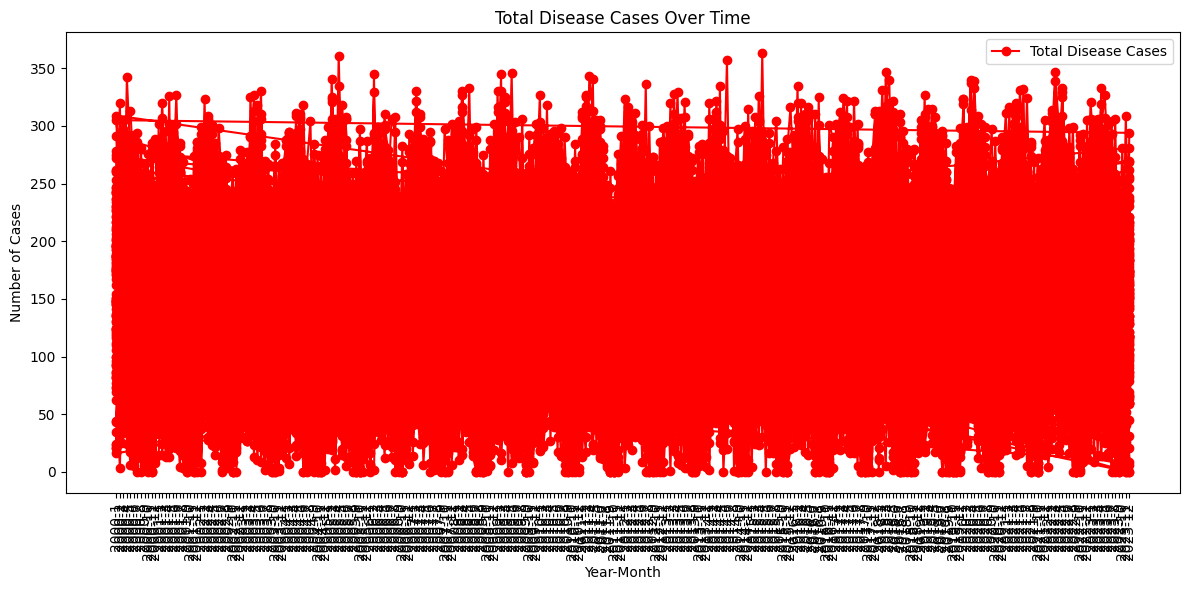

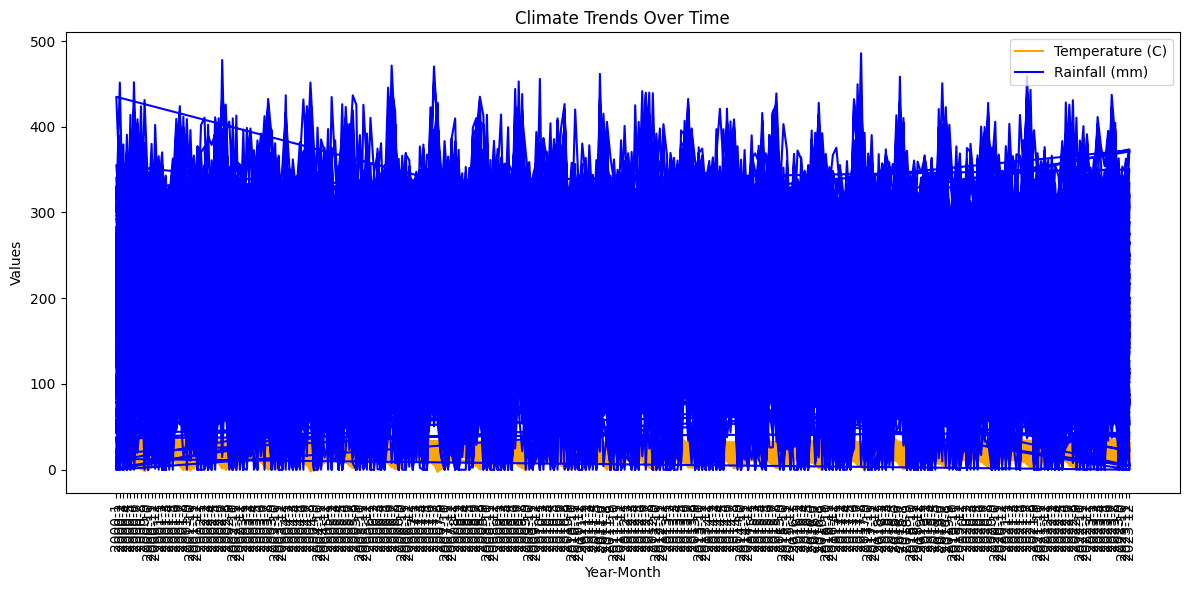

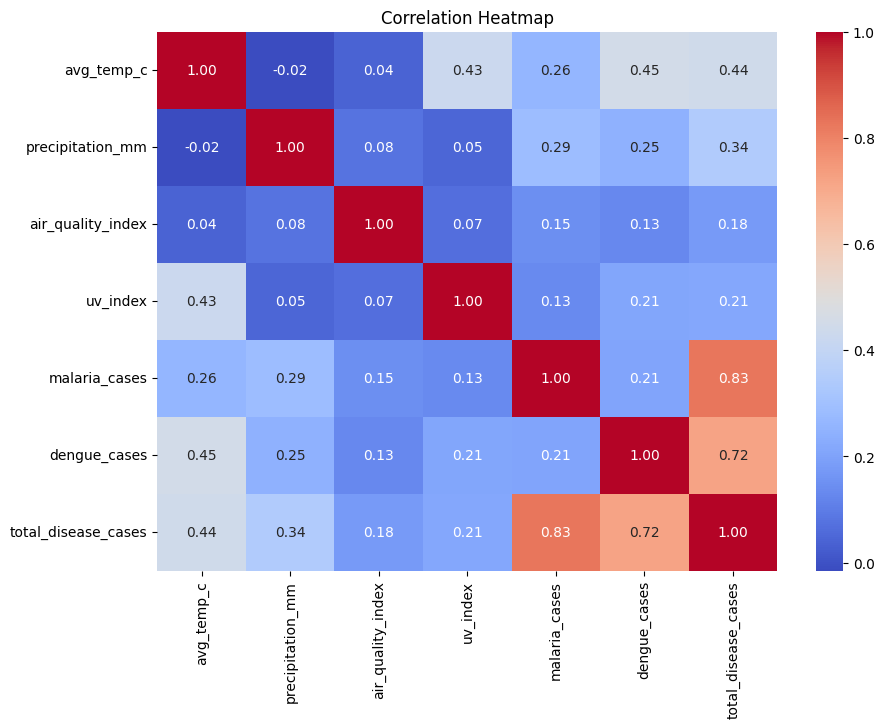

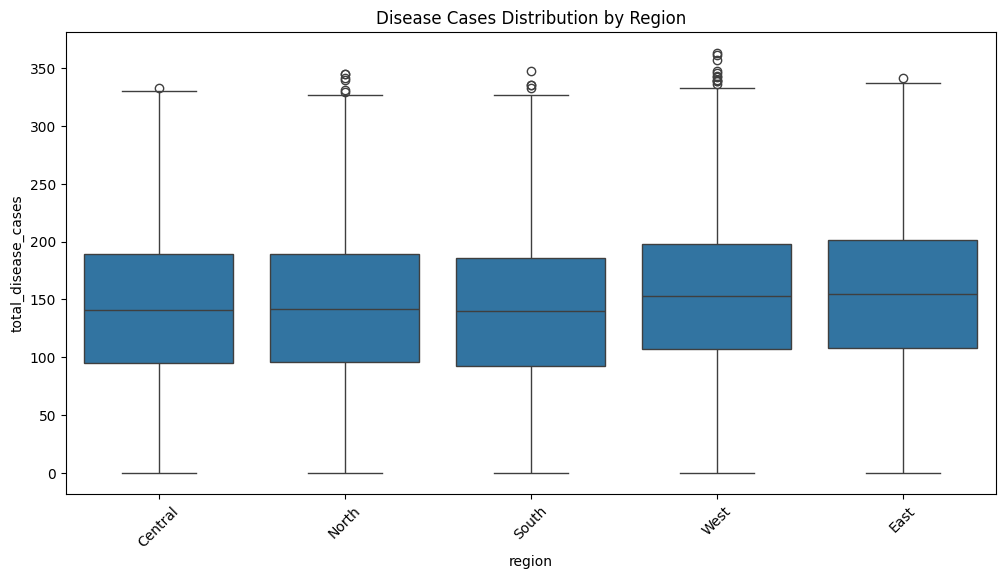

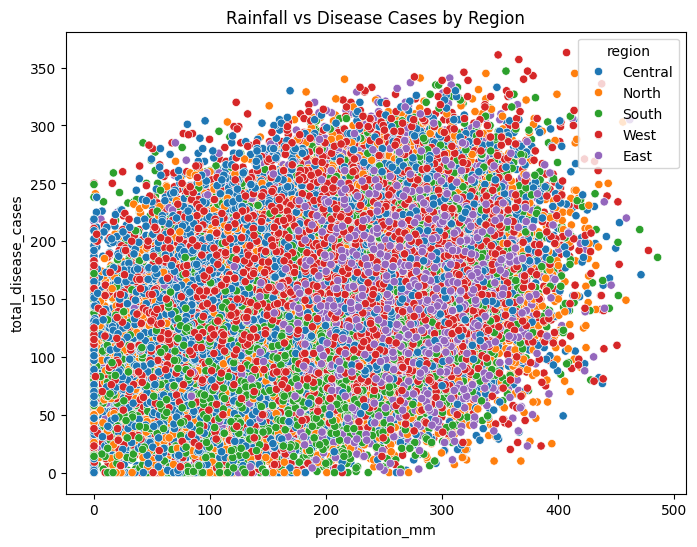

In [7]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas

# Create total disease cases
df['total_disease_cases'] = df['malaria_cases'] + df['dengue_cases']

# --- 1. Disease Cases Over Time ---
plt.figure(figsize=(12,6))
plt.plot(df['year'].astype(str) + "-" + df['month'].astype(str),
         df['total_disease_cases'], marker='o', color='red', label='Total Disease Cases')
plt.xticks(rotation=90)
plt.title("Total Disease Cases Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Cases")
plt.legend()
plt.tight_layout()
plt.show()

# --- 2. Climate Variables Over Time ---
plt.figure(figsize=(12,6))
plt.plot(df['year'].astype(str) + "-" + df['month'].astype(str), df['avg_temp_c'], label="Temperature (C)", color='orange')
plt.plot(df['year'].astype(str) + "-" + df['month'].astype(str), df['precipitation_mm'], label="Rainfall (mm)", color='blue')
# Removed the line plotting 'humidity_percent' as it does not exist
plt.xticks(rotation=90)
plt.title("Climate Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.show()

# --- 3. Correlation Heatmap ---
plt.figure(figsize=(10,7))
sns.heatmap(df[['avg_temp_c','precipitation_mm',
                'air_quality_index','uv_index',
                'malaria_cases','dengue_cases','total_disease_cases']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# --- 4. Disease Distribution by Region ---
plt.figure(figsize=(12,6))
sns.boxplot(x='region', y='total_disease_cases', data=df)
plt.title("Disease Cases Distribution by Region")
plt.xticks(rotation=45)
plt.show()

# --- 5. Scatter Plot: Rainfall vs Disease ---
plt.figure(figsize=(8,6))
sns.scatterplot(x='precipitation_mm', y='total_disease_cases', hue='region', data=df)
plt.title("Rainfall vs Disease Cases by Region")
plt.show()

In [13]:
#Train the Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Create target variable (y) and features (X)
df['total_disease_cases'] = df['malaria_cases'] + df['dengue_cases']
X = df[['avg_temp_c', 'precipitation_mm',
        'air_quality_index', 'uv_index']] # Removed 'humidity_percent'
y = df['total_disease_cases']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
# Predictions on test set
y_pred = model.predict(X_test)

print("First 10 Predictions:", y_pred[:10])
print("First 10 Actual Values:", y_test.values[:10])


First 10 Predictions: [118.02 173.97 113.14 124.14 155.9  147.7  133.98 120.53 100.12  90.99]
First 10 Actual Values: [125  76  92 144 144 206 136 250 125 150]


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Model Evaluation:
Mean Squared Error (MSE): 3129.539116521991
Root Mean Squared Error (RMSE): 55.94228379787503
Mean Absolute Error (MAE): 45.66059895833333
R² Score: 0.2626567846230401


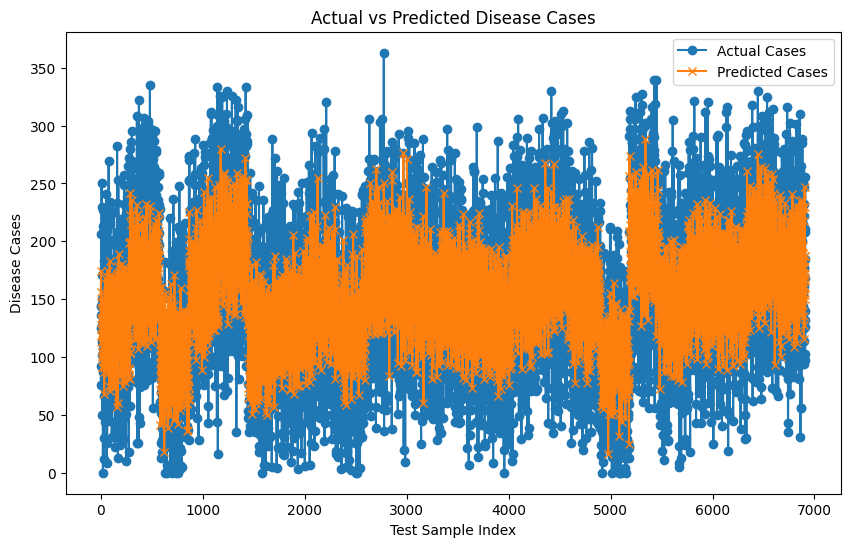

In [17]:
#Plot Predictions vs Actual
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Cases", marker='o')
plt.plot(y_pred, label="Predicted Cases", marker='x')
plt.title("Actual vs Predicted Disease Cases")
plt.xlabel("Test Sample Index")
plt.ylabel("Disease Cases")
plt.legend()
plt.show()
